China bans Bitcoin mining, a brief analysis of how this impacts Bitcoin Blockchain.

The Hashrate of Bitcoin has gone down 46% from the peak of May 2021. It has gone down to 91,2 EH/s from the maximum of 171,4 EH/s.

Also earnings has gone down from 0,449$ per day / TH/s down to 0,226$.

Miners are closing acrivities, stopping ASICs and moving to other countries such as Kazakhstan, Iran, USA (Texas, Maryland), and others.

The Sichuan region that was evaluated to host about 50% of the global hashrate of Bitcoin mining (due primarly to low cost of energy during the rain season using hydroelectric energy) has seen quite all mining companies halting activities from the 24:00 of 19th June 2021.

What are the consequences of such brutal and sudden reduction of hashrate? In theory, less competition in mining means less security to prevent the 51% attack, although it is still highly unlikely to happen for many other reasons.

Another consequence is that the difficulty adjusting, which takes place roughly every two weeks, will be the biggest in all Bitcoin history, and it is expected go down about -20%. During this time we shall see longer time to mining blocks, for i.e.

Let's analyze blockchain and see what is happening.


In [68]:
import blocksci
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

chain = blocksci.Blockchain("/BlockSci/config_file")

In [69]:
def blocks_time(first_block, last_block):
   
    heights = []
    
    day_month_year = []
    
    hour_min_sec = []
    
    datetime = []
    
    month_list = []
    
    year_list = []
    
    difficulty = []
        
    for y in range(first_block,last_block) :
    
        block_height = chain.blocks[y].height
        
        block_time = chain.blocks[y].time
        
        block_diff = chain.blocks[y].bits
        
        year = str(block_time.year)
        
        month = str(block_time.month)       
                
        date = str(block_time.day) + "-" + str(block_time.month) + "-" + str(block_time.year)
        
        time = str(block_time.hour) + ":" + str(block_time.minute) + ":" + str(block_time.second)
        
        
        
        #print(y)
        
        
        
        heights.append(block_height)
        
        difficulty.append(block_diff)
        
        month_list.append(month)

        year_list.append(year)

        day_month_year.append(date)
                
        hour_min_sec.append(time)
        
        datetime.append(block_time)
        '''
        if len(datetime) > 1:
            
            print("datetime > 1")
            
            for k in range(len(datetime)):
                
                duration = datetime[k -1] - datetime[k-2]
                
                duration_in_s = duration.total_seconds()
                
                time_duration.append(duration_in_s)
                
                print(time_duration)
                
                
            '''        
        
    print(len(heights))
    print(len(month_list))
    print("year")
    print(len(year_list ))


    df = pd.DataFrame(np.column_stack([heights, year_list, month_list, day_month_year, hour_min_sec, datetime, difficulty]), 
                               columns=['block_height', 'year', 'month' ,'d-m-y', 'h-m-s', 'datetime', 'difficulty'])        
    
    
    return df



In [70]:
df = blocks_time(250000,689235)

439235
439235
year
439235


In [71]:
df

,block_height,year,month,d-m-y,h-m-s,datetime,difficulty
0,250000,2013,8,3-8-2013,12:36:23,2013-08-03 12:36:23,426957810
1,250001,2013,8,3-8-2013,12:47:32,2013-08-03 12:47:32,426957810
2,250002,2013,8,3-8-2013,12:48:37,2013-08-03 12:48:37,426957810
3,250003,2013,8,3-8-2013,13:0:11,2013-08-03 13:00:11,426957810
4,250004,2013,8,3-8-2013,13:7:53,2013-08-03 13:07:53,426957810
...,...,...,...,...,...,...,...
439230,689230,2021,6,30-6-2021,15:44:32,2021-06-30 15:44:32,386801401
439231,689231,2021,6,30-6-2021,15:51:47,2021-06-30 15:51:47,386801401
439232,689232,2021,6,30-6-2021,15:54:53,2021-06-30 15:54:53,386801401
439233,689233,2021,6,30-6-2021,16:36:41,2021-06-30 16:36:41,386801401


In [72]:
def calc_time_validation(df):
    
    datetime_object = df['datetime']
    
    time_duration = []
    
    for k in range(len(datetime_object)):
    
        if k >= 1:
        
            duration = datetime_object[k] - datetime_object[k-1]
                
            duration_in_s = duration.total_seconds()
                
            time_duration.append(duration_in_s)
    
    
    time_duration.insert(0, "NaN")
    
    df.insert(4, 'time to validate block', time_duration)
    
    df = df.iloc[1:]
    
    return df, time_duration

In [73]:
df, time_duration = calc_time_validation(df)

In [74]:
time_duration

['NaN',
 669.0,
 65.0,
 694.0,
 462.0,
 59.0,
 266.0,
 418.0,
 80.0,
 624.0,
 100.0,
 1702.0,
 600.0,
 352.0,
 531.0,
 41.0,
 2812.0,
 735.0,
 358.0,
 1236.0,
 27.0,
 898.0,
 1516.0,
 1794.0,
 1293.0,
 226.0,
 178.0,
 973.0,
 1505.0,
 1980.0,
 3340.0,
 41.0,
 369.0,
 321.0,
 193.0,
 257.0,
 952.0,
 365.0,
 181.0,
 1138.0,
 315.0,
 75.0,
 638.0,
 551.0,
 640.0,
 725.0,
 675.0,
 1375.0,
 56.0,
 76.0,
 506.0,
 118.0,
 80.0,
 303.0,
 60.0,
 405.0,
 223.0,
 363.0,
 535.0,
 576.0,
 249.0,
 1072.0,
 1215.0,
 95.0,
 840.0,
 349.0,
 654.0,
 204.0,
 496.0,
 536.0,
 23.0,
 262.0,
 574.0,
 842.0,
 810.0,
 483.0,
 450.0,
 872.0,
 365.0,
 401.0,
 759.0,
 471.0,
 243.0,
 229.0,
 56.0,
 563.0,
 678.0,
 235.0,
 323.0,
 262.0,
 3425.0,
 349.0,
 227.0,
 243.0,
 426.0,
 178.0,
 534.0,
 662.0,
 187.0,
 1464.0,
 665.0,
 76.0,
 42.0,
 28.0,
 173.0,
 1217.0,
 105.0,
 993.0,
 85.0,
 171.0,
 153.0,
 226.0,
 676.0,
 30.0,
 1033.0,
 23.0,
 825.0,
 237.0,
 1475.0,
 5.0,
 550.0,
 142.0,
 145.0,
 472.0,
 34.0,
 117.

In [75]:
def calc_moving_averages(df, time_duration, window_size):
    
    time_duration.pop(0)
    
    t = 0
    
    moving_averages = []
    
    while t < len(time_duration) - window_size + 1:
        
        this_window = time_duration[t : t + window_size]

        window_average = sum(this_window) / window_size
        
        moving_averages.append(window_average)
        
        t += 1

    print("before Nan:" + str(len(moving_averages)))
    
    p = 0

    for p in range(0, window_size - 1):
    
        moving_averages.insert(0, "NaN")
        
    print("after adding Nan:" + str(len(moving_averages)))
    
    df["moving_averages"] = moving_averages
    
    df = df.iloc[window_size:]
    
    print(len(df))
   
    return df, moving_averages

In [76]:
df, moving_averages = calc_moving_averages(df, time_duration, 15)

before Nan:439220
after adding Nan:439234
439219


In [77]:
moving_averages

['NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 444.2,
 587.0666666666667,
 631.7333333333333,
 609.3333333333334,
 660.9333333333333,
 658.8,
 700.9333333333333,
 774.1333333333333,
 888.4,
 933.0,
 941.4,
 839.8,
 864.6666666666666,
 941.5333333333333,
 1038.1333333333334,
 1258.0666666666666,
 1073.3333333333333,
 1048.9333333333334,
 1046.4666666666667,
 976.9333333333333,
 992.2666666666667,
 995.8666666666667,
 919.1333333333333,
 811.6,
 801.2666666666667,
 807.2,
 800.3333333333334,
 778.0,
 714.4,
 625.0666666666667,
 450.73333333333335,
 493.0,
 560.0666666666667,
 542.4,
 534.6,
 551.2,
 495.6,
 476.6,
 484.73333333333335,
 412.8666666666667,
 418.8666666666667,
 428.73333333333335,
 410.4,
 409.3333333333333,
 405.06666666666666,
 373.3333333333333,
 399.8,
 389.1333333333333,
 391.73333333333335,
 442.6666666666667,
 432.2,
 467.93333333333334,
 476.2,
 489.06666666666666,
 520.8,
 495.3333333333333,
 497.933

In [78]:
df

,block_height,year,month,d-m-y,time to validate block,h-m-s,datetime,difficulty,moving_averages
16,250016,2013,8,3-8-2013,2812.0,15:14:18,2013-08-03 15:14:18,426957810,587.066667
17,250017,2013,8,3-8-2013,735.0,15:26:33,2013-08-03 15:26:33,426957810,631.733333
18,250018,2013,8,3-8-2013,358.0,15:32:31,2013-08-03 15:32:31,426957810,609.333333
19,250019,2013,8,3-8-2013,1236.0,15:53:7,2013-08-03 15:53:07,426957810,660.933333
20,250020,2013,8,3-8-2013,27.0,15:53:34,2013-08-03 15:53:34,426957810,658.8
...,...,...,...,...,...,...,...,...,...
439230,689230,2021,6,30-6-2021,1020.0,15:44:32,2021-06-30 15:44:32,386801401,985.866667
439231,689231,2021,6,30-6-2021,435.0,15:51:47,2021-06-30 15:51:47,386801401,945.0
439232,689232,2021,6,30-6-2021,186.0,15:54:53,2021-06-30 15:54:53,386801401,949.266667
439233,689233,2021,6,30-6-2021,2508.0,16:36:41,2021-06-30 16:36:41,386801401,1000.533333


In [79]:
df = df.reset_index(drop=True)
df

,block_height,year,month,d-m-y,time to validate block,h-m-s,datetime,difficulty,moving_averages
0,250016,2013,8,3-8-2013,2812.0,15:14:18,2013-08-03 15:14:18,426957810,587.066667
1,250017,2013,8,3-8-2013,735.0,15:26:33,2013-08-03 15:26:33,426957810,631.733333
2,250018,2013,8,3-8-2013,358.0,15:32:31,2013-08-03 15:32:31,426957810,609.333333
3,250019,2013,8,3-8-2013,1236.0,15:53:7,2013-08-03 15:53:07,426957810,660.933333
4,250020,2013,8,3-8-2013,27.0,15:53:34,2013-08-03 15:53:34,426957810,658.8
...,...,...,...,...,...,...,...,...,...
439214,689230,2021,6,30-6-2021,1020.0,15:44:32,2021-06-30 15:44:32,386801401,985.866667
439215,689231,2021,6,30-6-2021,435.0,15:51:47,2021-06-30 15:51:47,386801401,945.0
439216,689232,2021,6,30-6-2021,186.0,15:54:53,2021-06-30 15:54:53,386801401,949.266667
439217,689233,2021,6,30-6-2021,2508.0,16:36:41,2021-06-30 16:36:41,386801401,1000.533333


In [80]:
df.dtypes

block_height                      object
year                              object
month                             object
d-m-y                             object
time to validate block            object
h-m-s                             object
datetime                  datetime64[ns]
difficulty                        object
moving_averages                   object
dtype: object

<AxesSubplot:xlabel='datetime'>

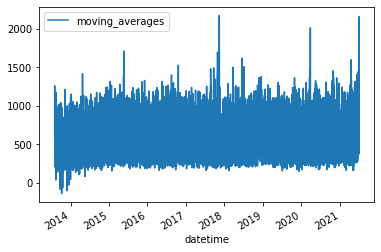

In [82]:
df.plot.line(x="datetime", y="moving_averages",)

<AxesSubplot:xlabel='d-m-y'>

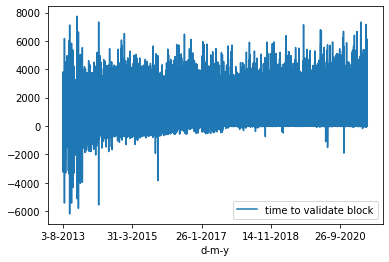

In [83]:
df.plot.line(x="d-m-y", y="time to validate block",)


<AxesSubplot:xlabel='Date', ylabel='Minutes'>

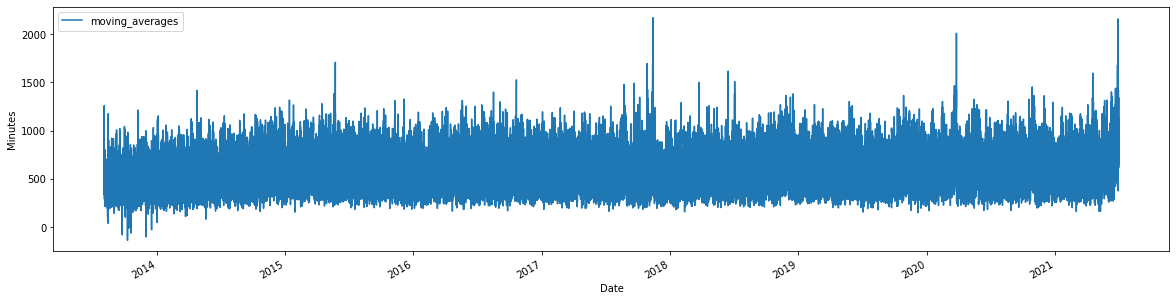

In [84]:
df.plot.line(x="datetime", y="moving_averages",figsize=(20, 5), ylabel="Minutes",xlabel="Date")

In [85]:
df2 = df[["datetime","time to validate block", "difficulty"]]

In [86]:
df2

,datetime,time to validate block,difficulty
0,2013-08-03 15:14:18,2812.0,426957810
1,2013-08-03 15:26:33,735.0,426957810
2,2013-08-03 15:32:31,358.0,426957810
3,2013-08-03 15:53:07,1236.0,426957810
4,2013-08-03 15:53:34,27.0,426957810
...,...,...,...
439214,2021-06-30 15:44:32,1020.0,386801401
439215,2021-06-30 15:51:47,435.0,386801401
439216,2021-06-30 15:54:53,186.0,386801401
439217,2021-06-30 16:36:41,2508.0,386801401


In [88]:
last_df = df2.set_index('datetime')
last_df

,time to validate block,difficulty
datetime,,
2013-08-03 15:14:18,2812.0,426957810
2013-08-03 15:26:33,735.0,426957810
2013-08-03 15:32:31,358.0,426957810
2013-08-03 15:53:07,1236.0,426957810
2013-08-03 15:53:34,27.0,426957810
...,...,...
2021-06-30 15:44:32,1020.0,386801401
2021-06-30 15:51:47,435.0,386801401
2021-06-30 15:54:53,186.0,386801401


In [89]:
last_df.dtypes

time to validate block    object
difficulty                object
dtype: object

In [90]:
last_df['time to validate block'] = last_df['time to validate block'].astype(str).astype(float)
last_df['difficulty'] = last_df['difficulty'].astype(str).astype(float)

In [91]:
last_df

,time to validate block,difficulty
datetime,,
2013-08-03 15:14:18,2812.0,426957810.0
2013-08-03 15:26:33,735.0,426957810.0
2013-08-03 15:32:31,358.0,426957810.0
2013-08-03 15:53:07,1236.0,426957810.0
2013-08-03 15:53:34,27.0,426957810.0
...,...,...
2021-06-30 15:44:32,1020.0,386801401.0
2021-06-30 15:51:47,435.0,386801401.0
2021-06-30 15:54:53,186.0,386801401.0


In [92]:
time = last_df["time to validate block"]
diff = last_df["difficulty"]

In [93]:
means = time.groupby(pd.Grouper(freq='1D')).mean()
means

datetime
2013-08-03     700.291667
2013-08-04     479.743017
2013-08-05     463.825397
2013-08-06     454.200000
2013-08-07     462.123656
                 ...     
2021-06-26    1005.764045
2021-06-27    1398.327586
2021-06-28    1041.261364
2021-06-29     955.411111
2021-06-30     915.378788
Freq: D, Name: time to validate block, Length: 2889, dtype: float64

In [94]:
means_diff = diff.groupby(pd.Grouper(freq="1D")).mean()
means_diff

datetime
2013-08-03    426957810.0
2013-08-04    426957810.0
2013-08-05    426957810.0
2013-08-06    426957810.0
2013-08-07    426957810.0
                 ...     
2021-06-26    386801401.0
2021-06-27    386801401.0
2021-06-28    386801401.0
2021-06-29    386801401.0
2021-06-30    386801401.0
Freq: D, Name: difficulty, Length: 2889, dtype: float64

<AxesSubplot:title={'center':'Bitcoin Average Confirmation Time'}, xlabel='Date(daily)', ylabel='Seconds'>

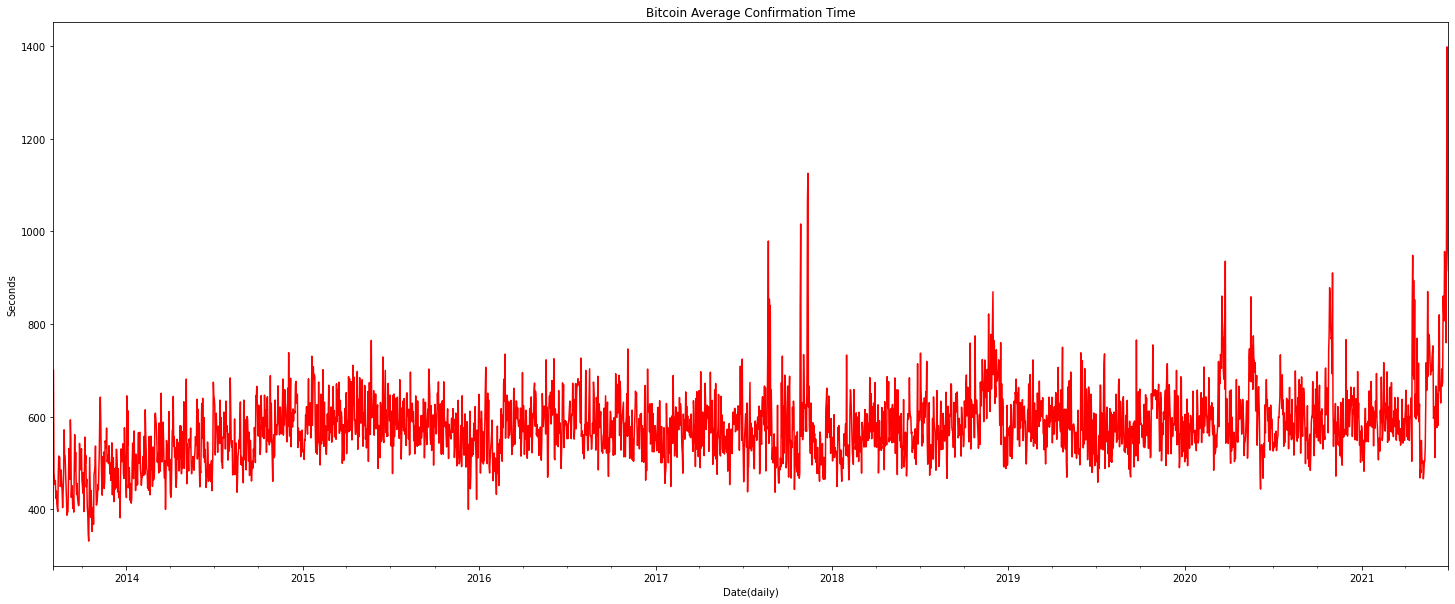

In [95]:

'''
import matplotlib.pyplot as plt

fig = means.plot.line.figure(y="time to validate block", 
                title="Daily average for the validation of a block",
                ylabel="Seconds", 
                xlabel="Date",
                figsize=(20,20))
                 
ax = plt.subplot(111,aspect = 'equal')
                 
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

'''
means.plot.line( 
                title="Bitcoin Average Confirmation Time",
                ylabel="Seconds", 
                xlabel="Date(daily)",
                color={"time to validate block": "#ff0000" },
               figsize=(25,10))

<AxesSubplot:title={'center':'Daily average for the validation of a block'}, xlabel='Date', ylabel='Seconds'>

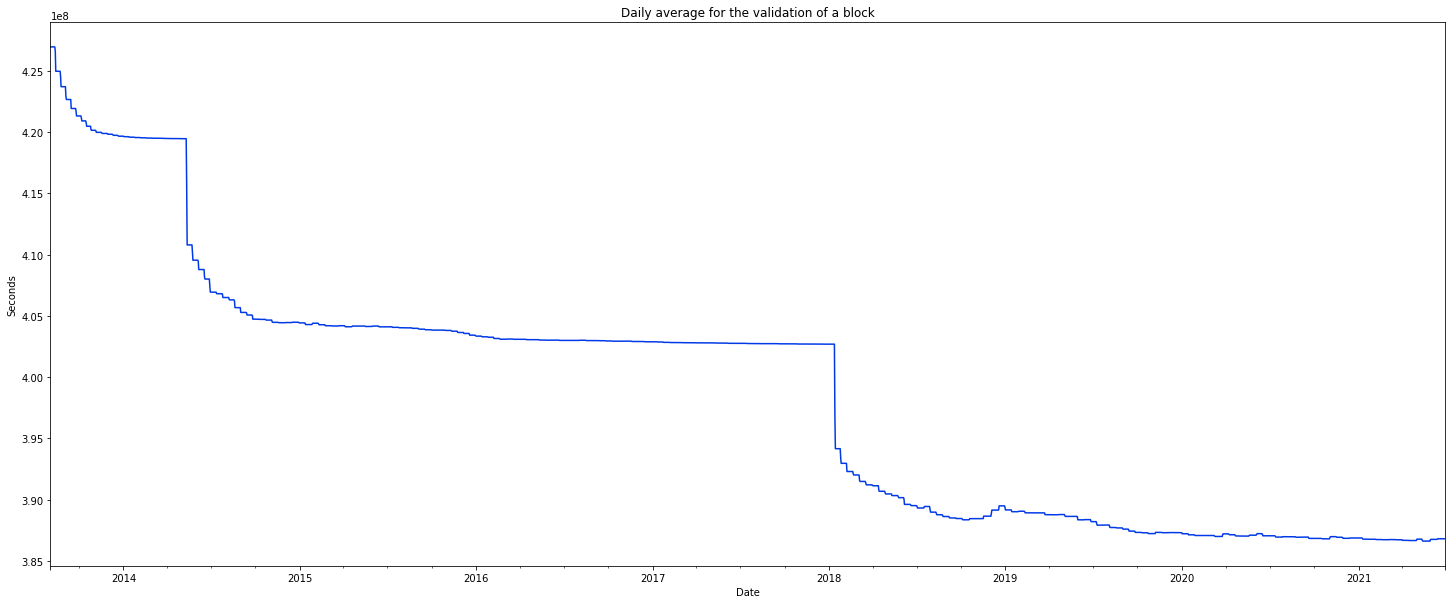

In [96]:
means_diff.plot.line( 
                title="Daily average for the validation of a block",
                ylabel="Seconds", 
                xlabel="Date",
                color={"difficulty": "#0039e6" },
               figsize=(25,10))

#New Mining Difficulty = Previous Mining Difficulty * (Time To Mine Last 2016 blocks / 20,160 minutes)



In [ ]:
weekly_summary = last_df["moving_averages"].resample('d', on='datetime').mean()


In [ ]:
last_df['datetime'] = pd.to_datetime(last_df['datetime'])
last_df

In [ ]:
ax = last_df.resample("d").mean().plot(legend=False)
ax


Plutohash.com offers  access to Jupyter Notebook and all Bitcoin Blockchain Data, with Python libraries, so if you want to join the fray go to www.plutohash.com/beta and register for free access.

All the material included in this post is made using the Plutohash App.

Don't forget to smile!

In [ ]:
'''
def truncate(n, decimals):
    
    multiplier = 10 ** decimals
    
    return int(n * multiplier) / multiplier
'''